# Part II - Effective factors in Prosper Loan platform 
## by (Maurice Otsieno)

## Investigation Overview

In this investigation I considered the top 10 Listing Category by loan count and percentage so that I can examine the most common reasons for which borrowers use the Prosper platform.
I also looked at the employment category that has the highest number of completed, defaulted and chargedoff loans. This is to reveal the employment category that completed more of their loan payment.
The relationship that exist betweeen the number of friends that invested in a loan and number of investors that are not friends. This is to examine the correlation significance a numerical variable has on another numerical veriable.


## Dataset Overview

This dataset contains observations from the Prosper platform. Prosper is a peer-to-peer lending platform that provides personal loans to borrowers with fair or good credit. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Howerver, because we were not expected to explore all of the variables in the dataset we focused our investigation on 20 variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('cleaned_loan_data.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Top 10 Listing Category by Loan Count and Percentage

Here i want to obtain from my investigation is to know the top 10 reason why borrowers solicit for loan via the Prosper platform.

From my investigation i oberserved that most loans were taken for debt consolidation - act of taking out a new loan to pay off other smaller liabilities and consumer debts

The Listing Category with the second hightest count of loan is Not Available category. What this means is that; a large number of applicants couldn't find the category which defines thier purpose of application.
To tackle this: The Prosperplatform can provide option for new applicants to enter the reason for thier loan.

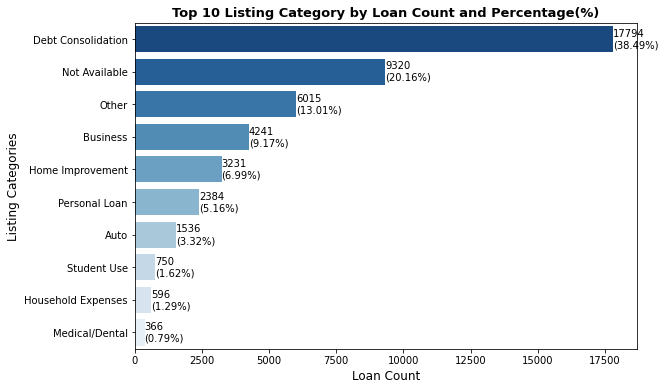

In [3]:
# Plot the Count and Percentage(%) of loan by Listing Category

# Select base color for plotting
base_color = sb.color_palette()[9]

# Get the count of the categories in ListingCategory Column
list_count = loan_data['ListingCategory'].value_counts().iloc[:10]

#Setting the size of the plot
plt.figure(figsize=[9,6])

# Making the plot
sb.countplot(data= loan_data, y='ListingCategory', 
             order=list_count.iloc[:10].index,
             palette='Blues_r')
# Adding anotations to the plot
for i in range (list_count.shape[0]):
    # Remember, list_count contains the frequency of unique values in the `ListingCategory` column in decreasing order.
    count = list_count[i]
    # Convert count into string
    ct_string = '{:0.2f}'.format(100*(count/list_count.sum()))
    # Print the string value on the bar. 
    plt.text(count+1, i, (str(count)+'\n'+'('+ct_string+'%)'), va='center')
plt.xlabel('Loan Count', fontsize=12)
plt.ylabel('Listing Categories', fontsize=12)
plt.title('Top 10 Listing Category by Loan Count and Percentage(%)',  fontsize=13,fontweight='heavy');

## Loan Amount and Status Across Employment Categories

Here I want to obtain from my investigation is to know which employment category has the highest number of completed, defaulted and chargedoff loans as well as the average loan amount across the categories.

Borrowers that are Not Employed have the most chargedoff loans.
For all other categories except 'employed and not-employed', have more loans that are defaulted.

From the pointplot below we can see that there is more completed loans from borrowers under the 'Employed' category.
The prosper platform can incentivise employed persons to use thier platform as they are more likely to complete their loan payment.

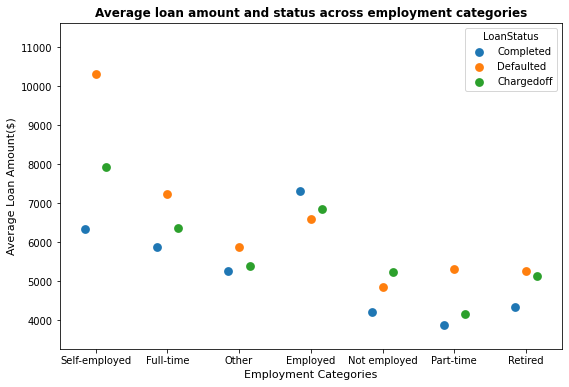

In [4]:
# Exclude 'cancelled' loans in listing category from our visualisation
local = loan_data[loan_data['LoanStatus'] != 'Cancelled']

#Setting the size of the plot
plt.figure(figsize=[9,6])

# Plotting a point plot
ax = sb.pointplot(data = local , x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'LoanStatus', 
                  dodge = 0.3, errwidth=False, linestyles = "")

plt.xlabel('Employment Categories', fontsize=11)
plt.ylabel('Average Loan Amount($)', fontsize=11)
plt.title('Average loan amount and status across employment categories' ,fontweight='bold', fontsize=12);

## Correlation Matrix of Prosper Loan Data
Here I want to obtain from my investigation is to know the degree of correlation that exist amongst the numerical variables of our dataset.

I found that the the number of investors for a loan is mostly determined by the Loan Original Amount, then by the stated monthly income of the applicants.

From our visual below we can say that the larger a loan amount is, the higher the number of investors who would invest in the loan. However, the stated monthly income of an applicant has a degree of impresion on investors.

There is a strong corralation between the number of friends who invest in a loan and the number of recomendations a the borrower has.

This simply means that friends who invest in a loan are most likely to make a recomendation.


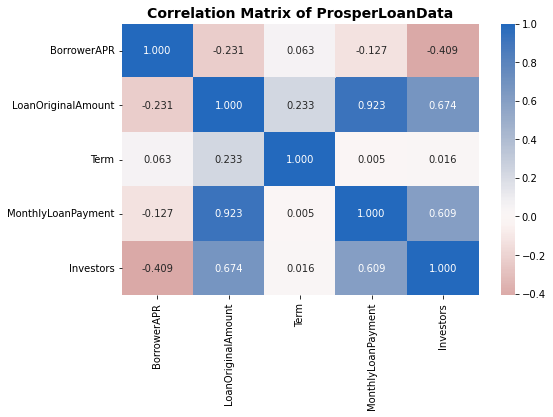

In [5]:
numeric_vars = ['BorrowerAPR', 'IncomeRange', 'LoanOriginalAmount', 'Term', 'MonthlyLoanPayment', 'Investors', 'CreditScoreRange']
categoric_vars = ['ListingCategory', 'LoanSatus', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable']

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix of ProsperLoanData', fontweight='heavy', fontsize=14);
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_ProsperLoanData_slides.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_ProsperLoanData_slides.ipynb to slides
[NbConvertApp] Writing 400258 bytes to Part_II_ProsperLoanData_slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_ProsperLoanData_slides.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
